In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import urllib2
import re
from subprocess import PIPE, Popen
import os
import glob
import re
import math

In [56]:
df = pd.read_csv("patient_laml.txt",sep=r"\s+")
df

,bcr_patient_barcode,gender,age_at_diagnosis,tumor_tissue_site
0,TCGA-AB-2802,MALE,50,Bone_Marrow
1,TCGA-AB-2803,FEMALE,61,Bone_Marrow
2,TCGA-AB-2804,MALE,30,Bone_Marrow
3,TCGA-AB-2805,MALE,77,Bone_Marrow
4,TCGA-AB-2806,MALE,46,Bone_Marrow
5,TCGA-AB-2807,FEMALE,68,Bone_Marrow
6,TCGA-AB-2808,MALE,23,Bone_Marrow
7,TCGA-AB-2809,FEMALE,64,Bone_Marrow
8,TCGA-AB-2810,FEMALE,76,Bone_Marrow
9,TCGA-AB-2811,MALE,81,Bone_Marrow


In [59]:
for i in range(0,2):
    df1 = pd.read_csv("laml/DNA_Methylation/JHU_USC__HumanMethylation27/Level_3/jhu-usc.edu_LAML.HumanMethylation27.1.lvl-3.TCGA-AB-"+
                      df.loc[i,'bcr_patient_barcode'][-4:]+"-03A-01D-0741-05.txt",sep=r"\s+")
    for j in range(1,df1.shape[0]):
        df.loc[df.index[i], df1.index[j]] = df1.iloc[j,0]
df 

,bcr_patient_barcode,gender,age_at_diagnosis,tumor_tissue_site,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,cg00011459,cg00012199,cg00012386,cg00012792,cg00013618,cg00014085,cg00014837,cg00015770,cg00016968,cg00019495,cg00020533,cg00021527,cg00022606,cg00022866,cg00024396,cg00024812,cg00025138,cg00025991,cg00027083,cg00027674,cg00029826,cg00029931,cg00030047,cg00031162,cg00032227,cg00032666,cg00033516,cg00033773,cg00034039,cg00035347,cg00035623,cg00037763,cg00037940,cg00040861,cg00040873,cg00041575,...,cg27607639,cg27608154,cg27609819,cg27610250,cg27610561,cg27611665,cg27611781,cg27613076,cg27614038,cg27619475,cg27622610,cg27623214,cg27625732,cg27626102,cg27626299,cg27626318,cg27626424,cg27626899,cg27627570,cg27628312,cg27631256,cg27631817,cg27633903,cg27634151,cg27635271,cg27635983,cg27637521,cg27638597,cg27638672,cg27638713,cg27641018,cg27643859,cg27644292,cg27648946,cg27649653,cg27649764,cg27650175,cg27650434,cg27651218,cg27652350,cg27653134,cg27654142,cg27655855,cg27655905,cg27657249,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
0,TCGA-AB-2802,MALE,50,Bone_Marrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-AB-2803,FEMALE,61,Bone_Marrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-AB-2804,MALE,30,Bone_Marrow,0.869796254327262,0.956351509562422,0.0328039420364536,0.07380597656889,NaN,0.0196252163995875,0.981749684415936,0.0132767748192579,0.0125817883205887,0.592830610609547,0.951298958683452,0.0114147401256018,0.065103606287576,0.0182294432697141,0.906504891787602,0.0190058754987495,NaN,0.108866219401654,0.880926277854189,0.756068254129922,0.942577611262279,0.00979703148226989,NaN,0.401589061265903,0.0240599701635558,0.0139803845186726,0.0153733742280415,0.371003421429688,0.154003137542146,NaN,0.0847281654123912,0.483423455685036,0.181716910306487,0.875107073881321,0.01127367820418,NaN,0.0188623136526221,0.95708546677326,0.0627397962264571,NaN,0.0509644726257772,0.830726494327306,0.948131534044568,0.0161836282888376,0.295495182192627,0.0392745438124858,...,0.00967051084969791,NaN,0.919412217334686,0.0173110312185662,NaN,0.0153288869987816,0.0650969807376726,0.0174314833508928,0.0123866894769948,0.0116931239399884,0.744750061390376,0.90183728023766,0.616698340472103,0.0878453544854888,0.115907698531129,0.0265087043721585,0.948218202717369,0.0962939651080993,0.0139833103227459,0.0248903900867752,0.0487629424091112,0.177841161909465,0.0346123175575491,0.191724610668034,0.861391393526448,0.0213626078761592,0.0329530995189209,0.011892648426167,NaN,0.0446460437494188,0.838834976403888,0.946011180807458,0.573631175269879,0.115609083385262,NaN,0.015981490756523,0.00840707639823648,0.0377838640901324,0.967288141818595,0.0706594816199851,0.945591781465945,0.030381735118992,NaN,0.0205594739993321,0.128421140805766,0.0325803609656099,0.448862241459029,0.0126042157400866,0.0191112221148853,0.082383728108227
3,TCGA-AB-2805,MALE,77,Bone_Marrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
processArray = glob.glob('data/geo-preprocessed/'+'*.csv')
processArray

[]

In [58]:
#Creating one large dataframe from all of the normalized data
for dfInd in range(0, len(processArray)):
    df = pd.read_csv(processArray[dfInd])
    if (dfInd == 0):
        preprocFull = df
    else:
        preprocFull = preprocFull.append(df)

In [59]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(preprocFull.shape[0]), train_size=0.7)
mask=np.ones(preprocFull.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask.shape, mask.sum()

((211,), 147)

In [60]:
#Setting up the x and y matrices. metColumns contains the column names for the variables we want to include
#in our regression. Right now it only contains the CpG sites, because the gender is not available for all 
#datasets. You can add variables by appending the column name into metColumns
metColumns = preprocFull.columns[[re.match('cg0', col) != None for col in preprocFull.columns]]
metDFx = preprocFull[metColumns]
metDFy = pd.DataFrame(preprocFull['age'])

In [61]:
def replaceNan(column):
    columnFix = column.fillna(column.mean())
    return columnFix
metDFx = metDFx.apply(replaceNan)
metDFy = metDFy.apply(replaceNan)['age']

In [62]:
Xmatrix_train=metDFx[mask]
Xmatrix_test=metDFx[~mask]
Yresp_train=metDFy[mask]
Yresp_test=metDFy[~mask]

In [63]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
regModel = LassoCV(cv=5, max_iter=10000).fit(Xmatrix_train, Yresp_train)

In [64]:
regModel.alpha_

0.0058332615074359233

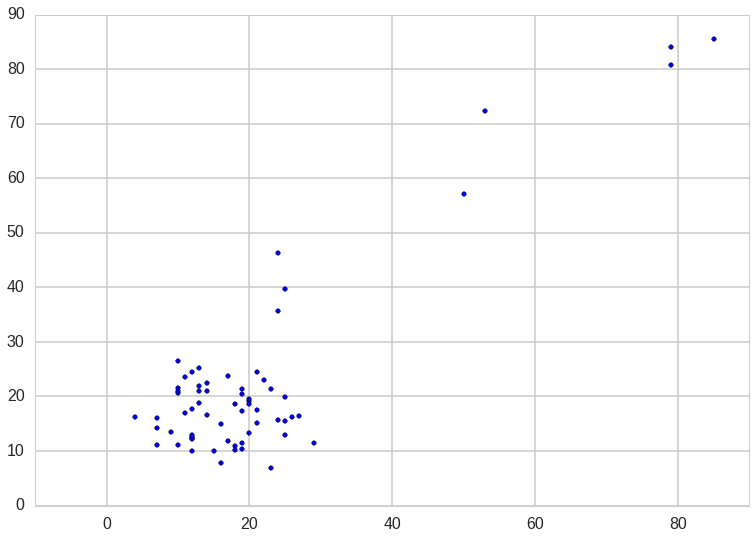

In [71]:
agePredictions = regModel.predict(Xmatrix_test)
plt.scatter(Yresp_test.values, agePredictions)